In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
df = pd.read_csv("/content/ETH-USD (BaoCao).csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1915,2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
1916,2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
1917,2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797
1918,2024-05-31,3746.861572,3843.857666,3723.835205,3760.026611,3760.026611,15290700646


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0        136.443619
1        134.206955
2        132.249420
3        127.774124
4        137.822388
           ...     
1915    3840.256348
1916    3763.196533
1917    3746.849609
1918    3760.026611
1919    3813.198975
Name: Close, Length: 1920, dtype: float64

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
train_data.shape

(1344, 1)

In [ ]:
test_data.shape

(576, 1)

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 18ms/step - loss: 0.0195
Epoch 2/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0015
Epoch 3/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0010
Epoch 4/100
20/20 [==============================] - 0s 18ms/step - loss: 9.2211e-04
Epoch 5/100
20/20 [==============================] - 0s 17ms/step - loss: 9.0505e-04
Epoch 6/100
20/20 [==============================] - 0s 17ms/step - loss: 8.0372e-04
Epoch 7/100
20/20 [==============================] - 0s 18ms/step - loss: 7.3558e-04
Epoch 8/100
20/20 [==============================] - 0s 18ms/step - loss: 7.0814e-04
Epoch 9/100
20/20 [==============================] - 0s 17ms/step - loss: 6.6049e-04
Epoch 10/100
20/20 [==============================] - 0s 17ms/step - loss: 6.4032e-04
Epoch 11/100
20/20 [==============================] - 0s 17ms/step - loss: 6.1773e-04
Epoch 12/100
20/20 [==============================] - 0s 17ms/step - loss: 

In [ ]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 8ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [ ]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mse = np.mean((np.array(ytest) - np.array(y_pred))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 2311.581617310203
Testing MAPE: 533999.7317708201
Testing MSE: 5343409.573486453


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [ ]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1


0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [ ]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

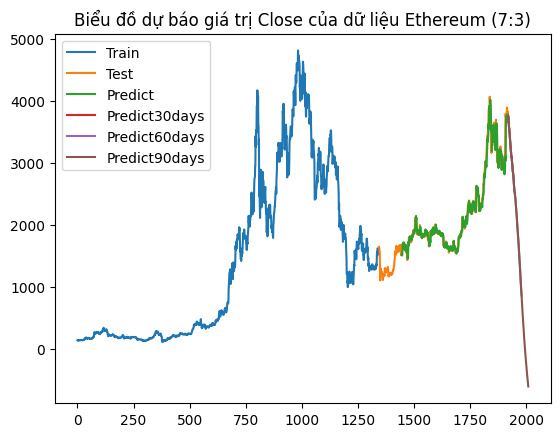

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Ethereum (7:3)")
plt.show()

In [ ]:
train_size_82 = int(0.8 * len(df1))
test_size_82 = len(df1) - train_size_82
train_data_82 = df1[:train_size_82]
test_data_82 = df1[train_size_82:train_size_82+test_size_82]

In [ ]:
X_train_82, y_train_82 = create_dataset(train_data_82, time_step)
X_test_82, ytest_82 = create_dataset(test_data_82, time_step)

In [ ]:
X_train_82 =X_train_82.reshape(X_train_82.shape[0],X_train_82.shape[1] , 1)
X_test_82 = X_test_82.reshape(X_test_82.shape[0],X_test_82.shape[1] , 1)

In [ ]:
model.fit(X_train_82,y_train_82,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 23ms/step - loss: 3.6073e-04
Epoch 2/100
23/23 [==============================] - 0s 17ms/step - loss: 3.6229e-04
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 3.6010e-04
Epoch 4/100
23/23 [==============================] - 0s 17ms/step - loss: 3.6090e-04
Epoch 5/100
23/23 [==============================] - 0s 17ms/step - loss: 3.5625e-04
Epoch 6/100
23/23 [==============================] - 0s 18ms/step - loss: 3.5708e-04
Epoch 7/100
23/23 [==============================] - 0s 17ms/step - loss: 3.6557e-04
Epoch 8/100
23/23 [==============================] - 0s 18ms/step - loss: 3.6006e-04
Epoch 9/100
23/23 [==============================] - 0s 18ms/step - loss: 3.5403e-04
Epoch 10/100
23/23 [==============================] - 0s 17ms/step - loss: 3.5753e-04
Epoch 11/100
23/23 [==============================] - 0s 18ms/step - loss: 3.7556e-04
Epoch 12/100
23/23 [==============================] - 0s 16ms/s

In [ ]:
train_predict_82=model.predict(X_train_82)
y_pred_82=model.predict(X_test_82)

9/9 [==============================] - 0s 6ms/step


In [ ]:
train_predict_82=scaler.inverse_transform(train_predict_82)
y_pred_82=scaler.inverse_transform(y_pred_82)

In [ ]:
test_82_rmse = np.sqrt(np.mean((y_pred_82 - ytest_82)**2))
test_82_mape = np.mean(np.abs((ytest_82 - y_pred_82) / ytest_82)) * 100
test_82_mse = np.mean((np.array(ytest_82) - np.array(y_pred_82))**2)
print('Testing RMSE:', test_82_rmse)
print('Testing MAPE:', test_82_mape)
print('Testing MSE:', test_82_mse)

Testing RMSE: 2653.5917078435036
Testing MAPE: 547630.2961446418
Testing MSE: 7041548.951935802


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [ ]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [ ]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

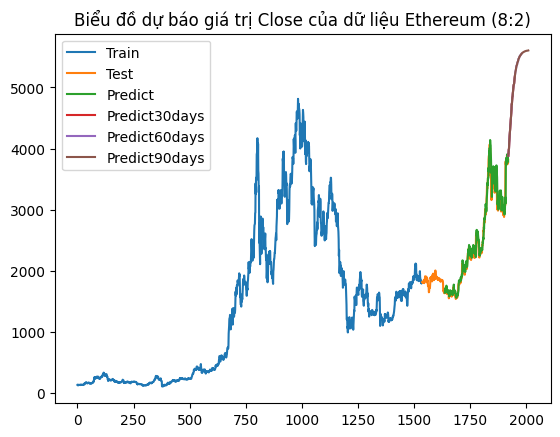

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(y_pred_82))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
prediect_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_60))
prediect_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Ethereum (8:2)")
plt.show()

In [ ]:
train_size_91 = int(0.9 * len(df1))
test_size_91 = len(df1) - train_size_91
train_data_91 = df1[:train_size_91]
test_data_91 = df1[train_size_91:train_size_91+test_size_91]

In [ ]:
X_train_91, y_train_91 = create_dataset(train_data_91, time_step)
X_test_91, ytest_91 = create_dataset(test_data_91, time_step)

In [ ]:
X_train_91 =X_train_91.reshape(X_train_91.shape[0],X_train_91.shape[1] , 1)
X_test_91 = X_test_91.reshape(X_test_91.shape[0],X_test_91.shape[1] , 1)

In [ ]:
model.fit(X_train_91,y_train_91,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 0s 18ms/step - loss: 3.3997e-04
Epoch 2/100
26/26 [==============================] - 0s 17ms/step - loss: 3.6726e-04
Epoch 3/100
26/26 [==============================] - 0s 19ms/step - loss: 3.0868e-04
Epoch 4/100
26/26 [==============================] - 0s 17ms/step - loss: 3.2129e-04
Epoch 5/100
26/26 [==============================] - 0s 19ms/step - loss: 3.5003e-04
Epoch 6/100
26/26 [==============================] - 0s 17ms/step - loss: 3.5395e-04
Epoch 7/100
26/26 [==============================] - 0s 18ms/step - loss: 3.2959e-04
Epoch 8/100
26/26 [==============================] - 0s 17ms/step - loss: 3.2548e-04
Epoch 9/100
26/26 [==============================] - 1s 29ms/step - loss: 3.1405e-04
Epoch 10/100
26/26 [==============================] - 1s 33ms/step - loss: 3.1511e-04
Epoch 11/100
26/26 [==============================] - 1s 31ms/step - loss: 3.1431e-04
Epoch 12/100
26/26 [==============================] - 1s 33ms/s

In [ ]:
train_predict_91=model.predict(X_train_91)
y_pred_91=model.predict(X_test_91)

3/3 [==============================] - 0s 7ms/step


In [ ]:
train_predict_91=scaler.inverse_transform(train_predict_91)
y_pred_91=scaler.inverse_transform(y_pred_91)

In [ ]:
test_91_rmse = np.sqrt(np.mean((y_pred_91 - ytest_91)**2))
test_91_mape = np.mean(np.abs((ytest_91 - y_pred_91) / ytest_91)) * 100
test_91_mse = np.mean((np.array(ytest_91) - np.array(y_pred_91))**2)
print('Testing RMSE:', test_91_rmse)
print('Testing MAPE:', test_91_mape)
print('Testing MSE:', test_91_mse)

Testing RMSE: 3397.9191275710605
Testing MAPE: 488861.2516125006
Testing MSE: 11545854.397513278


In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.59790777 0.61295149 0.63854157 0.65264274 0.66657997 0.69660977
 0.68729693 0.70710649 0.70434052 0.7190048  0.74866357 0.73261135
 0.78881953 0.80054378 0.80431139 0.8092796  0.8019998  0.84140269
 0.82307402 0.8286433  0.80241398 0.77095152 0.72578276 0.75121155
 0.72474585 0.6480962  0.72376913 0.71942968 0.68554606 0.68616416
 0.71127167 0.74025132 0.73953263 0.72094495 0.73395759 0.72343159
 0.72261019 0.75236934 0.72199032 0.67353848 0.68081434 0.68477024
 0.68239753 0.6899055  0.7110288  0.76245899 0.72201867 0.73022326
 0.72203664 0.66626424 0.61561329 0.64795235 0.63618127 0.63263341
 0.61132255 0.62861498 0.62717947 0.64809812 0.6458991  0.65746217
 0.66134595 0.64430739 0.64786039 0.64225689 0.66820689 0.67046287
 0.66039249 0.61718439 0.60814422 0.61205443 0.63659425 0.63957936
 0.6437637  0.62791332 0.61596994 0.6089679  0.62223251 0.59538368
 0.59576884 0.59940596 0.60379983 0.58929341 0.62245289 0.60290043
 0.63458992 0.6407221  0.62985192 0.75577232 0.782

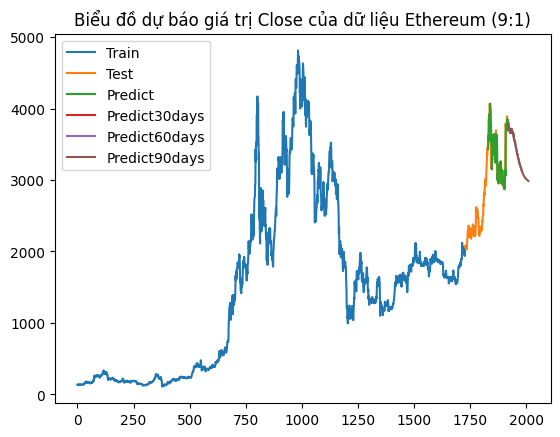

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(y_pred_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Ethereum (9:1)")
plt.show()